# Import Libraries 

In [2]:
# Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
# Import datasets

summer_raw = pd.read_csv("../Resources/summer.csv")

## Load the Data
### A quick look at the data-source
The data is stored in a comma separated file named summer.csv.


head olympics.csv

Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver

### Load the data into pandas
- Display the DataFrame

In [4]:
summer_raw.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
length = summer_raw["Event"].nunique()
length

666

In [5]:
summer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


# Clean up
* It is observed, from the csv.data that most of the Events are team sports.
* To achieve the exact number of Medal awarded; we drop duplicate columns (Athlete and Gender) in order to have a specific   event that matches a Medal 

In [6]:
remove_columns_df = summer_raw.drop(columns=["Athlete", "Gender", "Discipline"]).drop_duplicates()
remove_columns_df

,Year,City,Sport,Country,Event,Medal
0,1896,Athens,Aquatics,HUN,100M Freestyle,Gold
1,1896,Athens,Aquatics,AUT,100M Freestyle,Silver
2,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...
31160,2012,London,Wrestling,POL,Wg 84 KG,Bronze
31161,2012,London,Wrestling,IRI,Wg 96 KG,Gold
31162,2012,London,Wrestling,RUS,Wg 96 KG,Silver
31163,2012,London,Wrestling,ARM,Wg 96 KG,Bronze


In [7]:
remove_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14046 entries, 0 to 31164
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     14046 non-null  int64 
 1   City     14046 non-null  object
 2   Sport    14046 non-null  object
 3   Country  14042 non-null  object
 4   Event    14046 non-null  object
 5   Medal    14046 non-null  object
dtypes: int64(1), object(5)
memory usage: 768.1+ KB


In [8]:
total_event = remove_columns_df ["Event"].unique()
len(total_event)

666

## Part 1
* First we create a column to count Medals won by countries using Groupby

In [9]:
groupby_df = remove_columns_df.groupby(["Year", "Country", "Event"])["Medal"].count().reset_index()
groupby_df

,Year,Country,Event,Medal
0,1896,AUS,1500M,1
1,1896,AUS,800M,1
2,1896,AUT,100M Freestyle,1
3,1896,AUT,10KM,1
4,1896,AUT,12-Hour Race,1
...,...,...,...,...
11868,2012,USA,Épée Team,1
11869,2012,UZB,- 60 KG,1
11870,2012,UZB,69 - 75 KG,1
11871,2012,UZB,Wf 120KG,1


* Add a new column called Medal Count which will be specific to each event
* Assign a Medal Count of 1 Specific to each event

In [10]:
groupby_df["Medal count"] = 1
groupby_df

,Year,Country,Event,Medal,Medal count
0,1896,AUS,1500M,1,1
1,1896,AUS,800M,1,1
2,1896,AUT,100M Freestyle,1,1
3,1896,AUT,10KM,1,1
4,1896,AUT,12-Hour Race,1,1
...,...,...,...,...,...
11868,2012,USA,Épée Team,1,1
11869,2012,UZB,- 60 KG,1,1
11870,2012,UZB,69 - 75 KG,1,1
11871,2012,UZB,Wf 120KG,1,1


In [11]:
final_df = groupby_df.set_index("Year")
final_df

,Country,Event,Medal,Medal count
Year,,,,
1896,AUS,1500M,1,1
1896,AUS,800M,1,1
1896,AUT,100M Freestyle,1,1
1896,AUT,10KM,1,1
1896,AUT,12-Hour Race,1,1
...,...,...,...,...
2012,USA,Épée Team,1,1
2012,UZB,- 60 KG,1,1
2012,UZB,69 - 75 KG,1,1


In [13]:
# Total unique Events over the data range from 1896 to 2012
total_event

array(['100M Freestyle', '100M Freestyle For Sailors', '1200M Freestyle',
       '400M Freestyle', '100M', '110M Hurdles', '1500M', '400M', '800M',
       'Discus Throw', 'High Jump', 'Long Jump', 'Marathon', 'Pole Vault',
       'Shot Put', 'Triple Jump', 'Individual Road Race', '100KM', '10KM',
       '12-Hour Race', '1KM Time Trial', 'Sprint Indivual',
       'Foil Individual', 'Foil, Masters', 'Sabre Individual',
       'Horizontal Bar', 'Parallel Bars', 'Pommel Horse', 'Rings',
       'Rope Climbing', 'Team, Horizontal Bar', 'Team, Parallel Bars',
       'Vault', '25M Army Pistol', '25M Rapid Fire Pistol (60 Shots)',
       '50M Pistol (60 Shots)', 'Army Rifle, 200M', 'Army Rifle, 300M',
       'Doubles', 'Singles', 'Heavyweight - One Hand Lift',
       'Heavyweight - Two Hand Lift', 'Open Event', '1500M Freestyle',
       '200M Backstroke', '200M Freestyle', '200M Obstacle Event',
       '200M Team Swimming', '4000M Freestyle', 'Underwater Swimming',
       'Water Polo', 'Au Chap

### Data Visualization
* Question:which country medals in new events added
* The following keys years are selected and analysed the overall impact on countries
 1. 1896: The first ever summer Olympic games hosted by Greece
 2. 1920: The summer olympics after the First world war
 3. 1948: The summer olympics after the Second world war
 4. 1972: The mean year from the data discription
 5. 2012: The maximum point of the data

In [14]:
year_1896_df = final_df.loc[1896]
year_1896_df

,Country,Event,Medal,Medal count
Year,,,,
1896,AUS,1500M,1,1
1896,AUS,800M,1,1
1896,AUT,100M Freestyle,1,1
1896,AUT,10KM,1,1
1896,AUT,12-Hour Race,1,1
...,...,...,...,...
1896,USA,Long Jump,3,1
1896,USA,Pole Vault,2,1
1896,USA,Shot Put,1,1


In [15]:
year_2012_df = final_df.loc[2012]
year_2012_df

,Country,Event,Medal,Medal count
Year,,,,
2012,AFG,58 - 68 KG,1,1
2012,ALG,1500M,1,1
2012,ARG,470,1,1
2012,ARG,68 - 80 KG,1,1
2012,ARG,Hockey,1,1
...,...,...,...,...
2012,USA,Épée Team,1,1
2012,UZB,- 60 KG,1,1
2012,UZB,69 - 75 KG,1,1


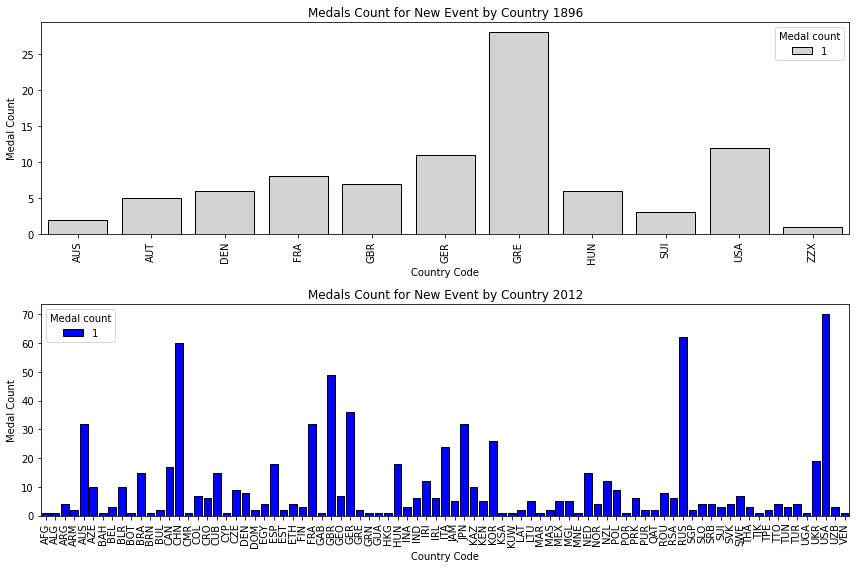

In [16]:
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

yr=sns.countplot(x="Country", hue = "Medal count", data = year_1896_df, fc='lightgray', ec='black' )
yr.set_xticklabels(yr.get_xticklabels(), rotation=90);
plt.title('Medals Count for New Event by Country 1896')
plt.xlabel('Country Code')
plt.ylabel('Medal Count')
plt.tight_layout()

plt.subplot(2,1,2)
yrr=sns.countplot(x="Country", hue = "Medal count", data = year_2012_df, fc='blue', ec='black' )
yrr.set_xticklabels(yrr.get_xticklabels(), rotation=90);
plt.title('Medals Count for New Event by Country 2012')
plt.xlabel('Country Code')
plt.ylabel('Medal Count')
plt.tight_layout()
plt.show()

The subplots above shows Country performance(Medal won) for the year 1896 which is the first ever Summer Olympic competition and the year 2012 maximum point of the data. It can be observed that Greece came up top with the United States, Germany, Great Britian and France all doing well. However in the 2012 Olympic games Greece was hardly seen as a force to reckon with but particularly the United States had the most medals. It is worth nothing that countries such as Germany, France, Italy, Great Britian and major Europian countries all do well. China and Japan are the major countries in the Asia Pacific who do extremely well.

In [17]:
year_1920_df = final_df.loc[1920]
year_1920_df

,Country,Event,Medal,Medal count
Year,,,,
1920,AUS,1500M Freestyle,1,1
1920,AUS,3000M Walk,1,1
1920,AUS,4X200M Freestyle Relay,1,1
1920,BEL,"- 60KG, One-Two Hand 3 Events (Featherweight)",1,1
1920,BEL,100M Backstroke,1,1
...,...,...,...,...
1920,USA,Polo,1,1
1920,USA,Rugby,1,1
1920,USA,Shot Put,1,1


In [18]:
year_1948_df = final_df.loc[1948]
year_1948_df

,Country,Event,Medal,Medal count
Year,,,,
1948,ARG,+ 80KG (Heavyweight),1,1
1948,ARG,- 51KG (Flyweight),1,1
1948,ARG,25M Rapid Fire Pistol (60 Shots),1,1
1948,ARG,6M,1,1
1948,ARG,73 - 80KG (Light-Heavyweight),1,1
...,...,...,...,...
1948,USA,Team,2,1
1948,USA,Team Competition,1,1
1948,USA,Two-Person Keelboat Open (Star),1,1


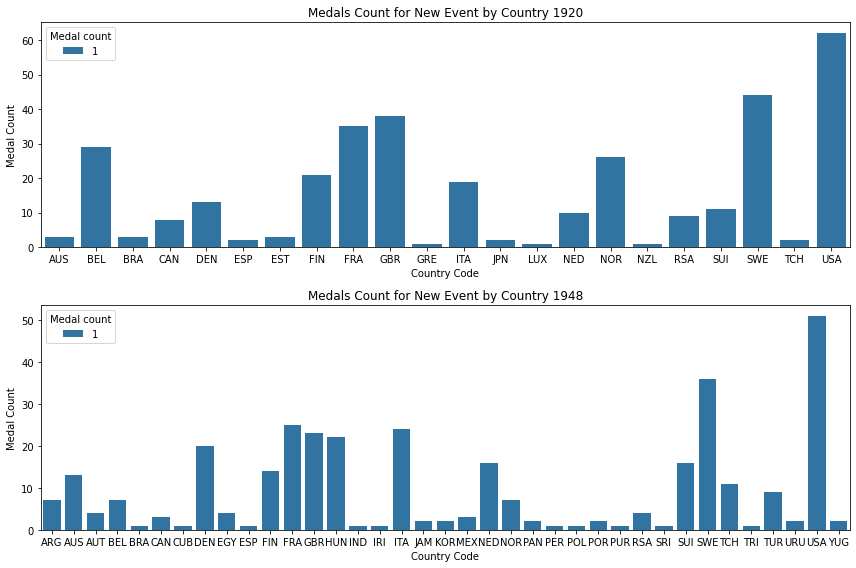

In [19]:
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.countplot(x="Country", hue = "Medal count", data = year_1920_df )
plt.title('Medals Count for New Event by Country 1920')
plt.xlabel('Country Code')
plt.ylabel('Medal Count')
plt.tight_layout()

plt.subplot(2,1,2)
sns.countplot(x="Country", hue = "Medal count", data = year_1948_df )
plt.title('Medals Count for New Event by Country 1948')
plt.xlabel('Country Code')
plt.ylabel('Medal Count')
plt.tight_layout()
plt.show()

The chart above gives a highlight of the summer olympics events after the first and the second world wars. Interestingly, USA, France Great Britian and major developed countries did not feel the impact of the first world war which is also evident in the second world war with the USA always coming on top in overall medal count. Another key event is that even though Japan in the year 1920 medals won, there was no podium place for Japan in the 1948 olympics. 

# Statistical analysis

In [13]:
per_country = final_df.groupby("Country")["Medal count"].sum().reset_index()
per_country

,Country,Medal count
0,AFG,2
1,AHO,1
2,ALG,15
3,ANZ,10
4,ARG,70
...,...,...
142,VIE,2
143,YUG,86
144,ZAM,2
145,ZIM,8


In [15]:
per_country.describe()

,Medal count
count,147.000000
mean,80.768707
std,174.119352
min,1.000000
25%,2.000000
50%,11.000000
75%,75.000000
max,1447.000000


<function matplotlib.pyplot.show(close=None, block=None)>

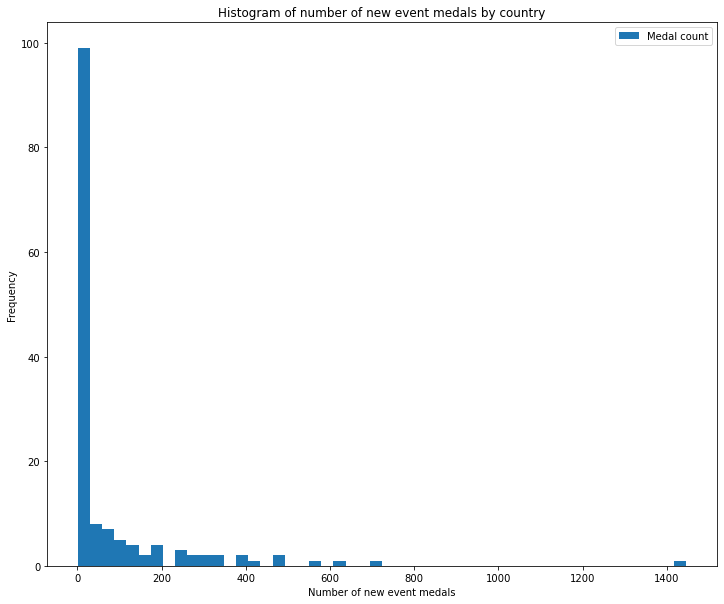

In [24]:
per_country.plot(kind="hist", by="Medal count", bins=50, figsize=(12,10))
plt.title("Histogram of number of new event medals by country")
plt.xlabel("Number of new event medals")
plt.savefig("../images/new_event_medals.png")
plt.show

In [23]:
per_country.sort_values("Medal count").tail()

,Country,Medal count
68,ITA,492
44,FRA,562
47,GBR,633
137,URS,706
139,USA,1447
